# Análise Exploratória de Dados - Voos Comerciais 2015

Este notebook apresenta uma análise exploratória completa dos dados de voos comerciais dos EUA em 2015, incluindo:
- Estatísticas descritivas
- Visualizações de insights
- Tratamento de valores ausentes

**Datasets:**
- `flights.csv`: Dados de voos (~5.8M registros)
- `airlines.csv`: Informações das companhias aéreas
- `airports.csv`: Informações dos aeroportos

## 1. Importação de Bibliotecas

In [1]:
# Importação de bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configurações
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


## 2. Carregamento dos Dados

In [2]:
# Carregando os datasets
print("Carregando dados...")

# Companhias aéreas
airlines = pd.read_csv('../data/airlines.csv')
print(f"✓ Airlines: {airlines.shape[0]} registros, {airlines.shape[1]} colunas")

# Aeroportos
airports = pd.read_csv('../data/airports.csv')
print(f"✓ Airports: {airports.shape[0]} registros, {airports.shape[1]} colunas")

# Voos - dataset grande, pode demorar
flights = pd.read_csv('../data/flights.csv')
print(f"✓ Flights: {flights.shape[0]} registros, {flights.shape[1]} colunas")

print("\nDados carregados com sucesso!")

Carregando dados...
✓ Airlines: 14 registros, 2 colunas
✓ Airports: 322 registros, 7 colunas
✓ Flights: 5819079 registros, 31 colunas

Dados carregados com sucesso!


## 3. Visão Geral dos Dados

### 3.1 Airlines (Companhias Aéreas)

In [3]:
print("=" * 60)
print("DATASET: AIRLINES")
print("=" * 60)
print(f"\nDimensões: {airlines.shape}")
print(f"\nPrimeiras linhas:")
display(airlines.head(10))
print(f"\nInformações do dataset:")
airlines.info()
print(f"\nValores ausentes:")
print(airlines.isnull().sum())

DATASET: AIRLINES

Dimensões: (14, 2)

Primeiras linhas:


,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.



Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IATA_CODE  14 non-null     object
 1   AIRLINE    14 non-null     object
dtypes: object(2)
memory usage: 356.0+ bytes

Valores ausentes:
IATA_CODE    0
AIRLINE      0
dtype: int64


### 3.2 Airports (Aeroportos)

In [4]:
print("=" * 60)
print("DATASET: AIRPORTS")
print("=" * 60)
print(f"\nDimensões: {airports.shape}")
print(f"\nPrimeiras linhas:")
display(airports.head(10))
print(f"\nInformações do dataset:")
airports.info()
print(f"\nValores ausentes:")
print(airports.isnull().sum())
print(f"\nEstados com mais aeroportos:")
print(airports['STATE'].value_counts().head(10))

DATASET: AIRPORTS

Dimensões: (322, 7)

Primeiras linhas:


,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
5,ACK,Nantucket Memorial Airport,Nantucket,MA,USA,41.25305,-70.06018
6,ACT,Waco Regional Airport,Waco,TX,USA,31.61129,-97.23052
7,ACV,Arcata Airport,Arcata/Eureka,CA,USA,40.97812,-124.10862
8,ACY,Atlantic City International Airport,Atlantic City,NJ,USA,39.45758,-74.57717
9,ADK,Adak Airport,Adak,AK,USA,51.87796,-176.64603



Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  322 non-null    object 
 1   AIRPORT    322 non-null    object 
 2   CITY       322 non-null    object 
 3   STATE      322 non-null    object 
 4   COUNTRY    322 non-null    object 
 5   LATITUDE   319 non-null    float64
 6   LONGITUDE  319 non-null    float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB

Valores ausentes:
IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

Estados com mais aeroportos:
STATE
TX    24
CA    22
AK    19
FL    17
MI    15
NY    14
CO    10
PA     8
ND     8
MT     8
Name: count, dtype: int64


### 3.3 Flights (Voos)

In [5]:
print("=" * 60)
print("DATASET: FLIGHTS")
print("=" * 60)
print(f"\nDimensões: {flights.shape}")
print(f"\nPrimeiras linhas:")
display(flights.head(10))
print(f"\nInformações do dataset:")
flights.info()
print(f"\nColunas do dataset:")
for i, col in enumerate(flights.columns, 1):
    print(f"{i:2}. {col}")

DATASET: FLIGHTS

Dimensões: (5819079, 31)

Primeiras linhas:


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,20.0,-5.0,18.0,38.0,217.0,230.0,206.0,1589,604.0,6.0,602,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,19.0,-6.0,11.0,30.0,181.0,170.0,154.0,1299,504.0,5.0,526,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,44.0,14.0,13.0,57.0,273.0,249.0,228.0,2125,745.0,8.0,803,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,19.0,-11.0,17.0,36.0,195.0,193.0,173.0,1464,529.0,3.0,545,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,33.0,3.0,12.0,45.0,221.0,203.0,186.0,1747,651.0,5.0,711,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN



Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTE

## 4. Análise de Valores Ausentes

ANÁLISE DE VALORES AUSENTES - FLIGHTS

Colunas com valores ausentes:


,Coluna,Missing_Count,Missing_Percent
CANCELLATION_REASON,CANCELLATION_REASON,5729195,98.46
WEATHER_DELAY,WEATHER_DELAY,4755640,81.72
LATE_AIRCRAFT_DELAY,LATE_AIRCRAFT_DELAY,4755640,81.72
AIRLINE_DELAY,AIRLINE_DELAY,4755640,81.72
SECURITY_DELAY,SECURITY_DELAY,4755640,81.72
AIR_SYSTEM_DELAY,AIR_SYSTEM_DELAY,4755640,81.72
ELAPSED_TIME,ELAPSED_TIME,105071,1.81
AIR_TIME,AIR_TIME,105071,1.81
ARRIVAL_DELAY,ARRIVAL_DELAY,105071,1.81
ARRIVAL_TIME,ARRIVAL_TIME,92513,1.59


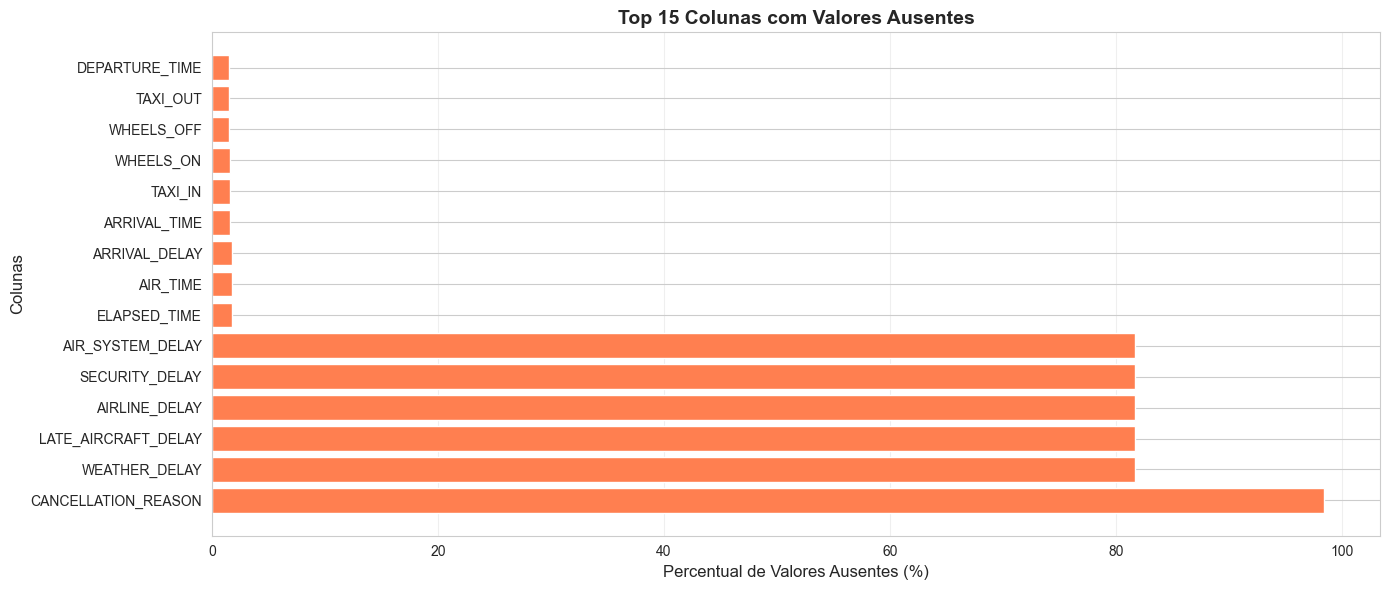


Total de colunas com valores ausentes: 18
Total de colunas: 31


In [6]:
# Análise detalhada de valores ausentes no dataset de flights
print("=" * 60)
print("ANÁLISE DE VALORES AUSENTES - FLIGHTS")
print("=" * 60)

missing_data = pd.DataFrame({
    'Coluna': flights.columns,
    'Missing_Count': flights.isnull().sum(),
    'Missing_Percent': (flights.isnull().sum() / len(flights) * 100).round(2)
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

print("\nColunas com valores ausentes:")
display(missing_data)

# Visualização
fig, ax = plt.subplots(figsize=(14, 6))
missing_data_plot = missing_data.head(15)
ax.barh(missing_data_plot['Coluna'], missing_data_plot['Missing_Percent'], color='coral')
ax.set_xlabel('Percentual de Valores Ausentes (%)', fontsize=12)
ax.set_ylabel('Colunas', fontsize=12)
ax.set_title('Top 15 Colunas com Valores Ausentes', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nTotal de colunas com valores ausentes: {len(missing_data)}")
print(f"Total de colunas: {len(flights.columns)}")

### 4.1 Estratégia de Tratamento de Valores Ausentes

**Análise:**
- Colunas de atraso (delays): Ausentes quando não há atraso ou voo foi cancelado
- CANCELLATION_REASON: Ausente quando voo não foi cancelado
- Tempos de operação: Ausentes para voos cancelados

**Estratégia de tratamento:**
1. Para colunas de atraso: Preencher com 0 (significa sem atraso)
2. Para CANCELLATION_REASON: Preencher com 'N' (Not Cancelled)
3. Para tempos de operação cancelados: Manter como NaN (são voos que não operaram)

In [7]:
# Criando uma cópia para tratamento
flights_clean = flights.copy()

# 1. Tratar colunas de atraso - preencher com 0
delay_columns = ['DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'AIR_SYSTEM_DELAY', 
                 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']

for col in delay_columns:
    if col in flights_clean.columns:
        flights_clean[col] = flights_clean[col].fillna(0)
        print(f"✓ {col}: preenchido com 0")

# 2. Tratar CANCELLATION_REASON
if 'CANCELLATION_REASON' in flights_clean.columns:
    flights_clean['CANCELLATION_REASON'] = flights_clean['CANCELLATION_REASON'].fillna('N')
    print(f"✓ CANCELLATION_REASON: preenchido com 'N' (Not Cancelled)")

# 3. Verificar resultado
print("\n" + "=" * 60)
print("RESULTADO DO TRATAMENTO")
print("=" * 60)
missing_after = pd.DataFrame({
    'Coluna': flights_clean.columns,
    'Missing_Count': flights_clean.isnull().sum(),
    'Missing_Percent': (flights_clean.isnull().sum() / len(flights_clean) * 100).round(2)
})
missing_after = missing_after[missing_after['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

print("\nColunas ainda com valores ausentes (esperado para voos cancelados):")
display(missing_after.head(10))

✓ DEPARTURE_DELAY: preenchido com 0
✓ ARRIVAL_DELAY: preenchido com 0
✓ AIR_SYSTEM_DELAY: preenchido com 0
✓ SECURITY_DELAY: preenchido com 0
✓ AIRLINE_DELAY: preenchido com 0
✓ LATE_AIRCRAFT_DELAY: preenchido com 0
✓ WEATHER_DELAY: preenchido com 0
✓ CANCELLATION_REASON: preenchido com 'N' (Not Cancelled)

RESULTADO DO TRATAMENTO

Colunas ainda com valores ausentes (esperado para voos cancelados):


,Coluna,Missing_Count,Missing_Percent
ELAPSED_TIME,ELAPSED_TIME,105071,1.81
AIR_TIME,AIR_TIME,105071,1.81
WHEELS_ON,WHEELS_ON,92513,1.59
TAXI_IN,TAXI_IN,92513,1.59
ARRIVAL_TIME,ARRIVAL_TIME,92513,1.59
TAXI_OUT,TAXI_OUT,89047,1.53
WHEELS_OFF,WHEELS_OFF,89047,1.53
DEPARTURE_TIME,DEPARTURE_TIME,86153,1.48
TAIL_NUMBER,TAIL_NUMBER,14721,0.25
SCHEDULED_TIME,SCHEDULED_TIME,6,0.00


## 5. Estatísticas Descritivas

### 5.1 Estatísticas Gerais

In [8]:
# Estatísticas descritivas principais
print("=" * 60)
print("ESTATÍSTICAS DESCRITIVAS - VOOS")
print("=" * 60)

# Selecionando colunas numéricas importantes
numeric_cols = ['DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'AIR_TIME', 'DISTANCE', 
                'ELAPSED_TIME', 'TAXI_OUT', 'TAXI_IN']

stats = flights_clean[numeric_cols].describe()
display(stats)

# Estatísticas adicionais
print("\n" + "=" * 60)
print("INFORMAÇÕES GERAIS")
print("=" * 60)
print(f"Total de voos: {len(flights_clean):,}")
print(f"Período: {flights_clean['YEAR'].min()} - Mês {flights_clean['MONTH'].min()} a {flights_clean['MONTH'].max()}")
print(f"Total de companhias aéreas: {flights_clean['AIRLINE'].nunique()}")
print(f"Total de aeroportos de origem: {flights_clean['ORIGIN_AIRPORT'].nunique()}")
print(f"Total de aeroportos de destino: {flights_clean['DESTINATION_AIRPORT'].nunique()}")
print(f"Voos cancelados: {flights_clean['CANCELLED'].sum():,} ({(flights_clean['CANCELLED'].sum()/len(flights_clean)*100):.2f}%)")
print(f"Voos desviados: {flights_clean['DIVERTED'].sum():,} ({(flights_clean['DIVERTED'].sum()/len(flights_clean)*100):.2f}%)")

ESTATÍSTICAS DESCRITIVAS - VOOS


,DEPARTURE_DELAY,ARRIVAL_DELAY,AIR_TIME,DISTANCE,ELAPSED_TIME,TAXI_OUT,TAXI_IN
count,5.819079e+06,5.819079e+06,5.714008e+06,5.819079e+06,5.714008e+06,5.730032e+06,5.726566e+06
mean,9.231431e+00,4.327482e+00,1.135116e+02,8.223565e+02,1.370062e+02,1.607166e+01,7.434971e+00
std,3.682282e+01,3.891956e+01,7.223082e+01,6.077843e+02,7.421107e+01,8.895574e+00,5.638548e+00
min,-8.200000e+01,-8.700000e+01,7.000000e+00,2.100000e+01,1.400000e+01,1.000000e+00,1.000000e+00
25%,-5.000000e+00,-1.300000e+01,6.000000e+01,3.730000e+02,8.200000e+01,1.100000e+01,4.000000e+00
50%,-1.000000e+00,-5.000000e+00,9.400000e+01,6.470000e+02,1.180000e+02,1.400000e+01,6.000000e+00
75%,7.000000e+00,7.000000e+00,1.440000e+02,1.062000e+03,1.680000e+02,1.900000e+01,9.000000e+00
max,1.988000e+03,1.971000e+03,6.900000e+02,4.983000e+03,7.660000e+02,2.250000e+02,2.480000e+02



INFORMAÇÕES GERAIS
Total de voos: 5,819,079
Período: 2015 - Mês 1 a 12
Total de companhias aéreas: 14
Total de aeroportos de origem: 930
Total de aeroportos de destino: 930
Voos cancelados: 89,884 (1.54%)
Voos desviados: 15,187 (0.26%)


### 5.2 Análise de Atrasos

In [9]:
# Análise de atrasos
print("=" * 60)
print("ANÁLISE DE ATRASOS")
print("=" * 60)

# Filtrar apenas voos não cancelados
flights_operated = flights_clean[flights_clean['CANCELLED'] == 0].copy()

print(f"\nVoos operados (não cancelados): {len(flights_operated):,}")
print(f"\nAtraso médio de partida: {flights_operated['DEPARTURE_DELAY'].mean():.2f} minutos")
print(f"Atraso médio de chegada: {flights_operated['ARRIVAL_DELAY'].mean():.2f} minutos")
print(f"\nVoos com atraso de partida > 15 min: {(flights_operated['DEPARTURE_DELAY'] > 15).sum():,} ({(flights_operated['DEPARTURE_DELAY'] > 15).sum()/len(flights_operated)*100:.2f}%)")
print(f"Voos com atraso de chegada > 15 min: {(flights_operated['ARRIVAL_DELAY'] > 15).sum():,} ({(flights_operated['ARRIVAL_DELAY'] > 15).sum()/len(flights_operated)*100:.2f}%)")

# Tipos de atraso
delay_types = {
    'Sistema Aéreo': flights_operated['AIR_SYSTEM_DELAY'].sum(),
    'Segurança': flights_operated['SECURITY_DELAY'].sum(),
    'Companhia Aérea': flights_operated['AIRLINE_DELAY'].sum(),
    'Aeronave Atrasada': flights_operated['LATE_AIRCRAFT_DELAY'].sum(),
    'Clima': flights_operated['WEATHER_DELAY'].sum()
}

print("\n" + "=" * 60)
print("TOTAL DE MINUTOS DE ATRASO POR TIPO")
print("=" * 60)
for tipo, minutos in sorted(delay_types.items(), key=lambda x: x[1], reverse=True):
    print(f"{tipo}: {minutos:,.0f} minutos ({minutos/60:,.0f} horas)")

ANÁLISE DE ATRASOS

Voos operados (não cancelados): 5,729,195

Atraso médio de partida: 9.34 minutos
Atraso médio de chegada: 4.40 minutos

Voos com atraso de partida > 15 min: 1,016,536 (17.74%)
Voos com atraso de chegada > 15 min: 1,023,498 (17.86%)

TOTAL DE MINUTOS DE ATRASO POR TIPO
Aeronave Atrasada: 24,961,931 minutos (416,032 horas)
Companhia Aérea: 20,172,956 minutos (336,216 horas)
Sistema Aéreo: 14,335,762 minutos (238,929 horas)
Clima: 3,100,233 minutos (51,671 horas)
Segurança: 80,985 minutos (1,350 horas)


## 6. Visualizações e Insights

### 6.1 Distribuição de Voos por Companhia Aérea

In [12]:
flights_by_airline

,AIRLINE_x,COUNT,IATA_CODE,AIRLINE_y
0,WN,1261855,WN,Southwest Airlines Co.
1,DL,875881,DL,Delta Air Lines Inc.
2,AA,725984,AA,American Airlines Inc.
3,OO,588353,OO,Skywest Airlines Inc.
4,EV,571977,EV,Atlantic Southeast Airlines
5,UA,515723,UA,United Air Lines Inc.
6,MQ,294632,MQ,American Eagle Airlines Inc.
7,B6,267048,B6,JetBlue Airways
8,US,198715,US,US Airways Inc.
9,AS,172521,AS,Alaska Airlines Inc.


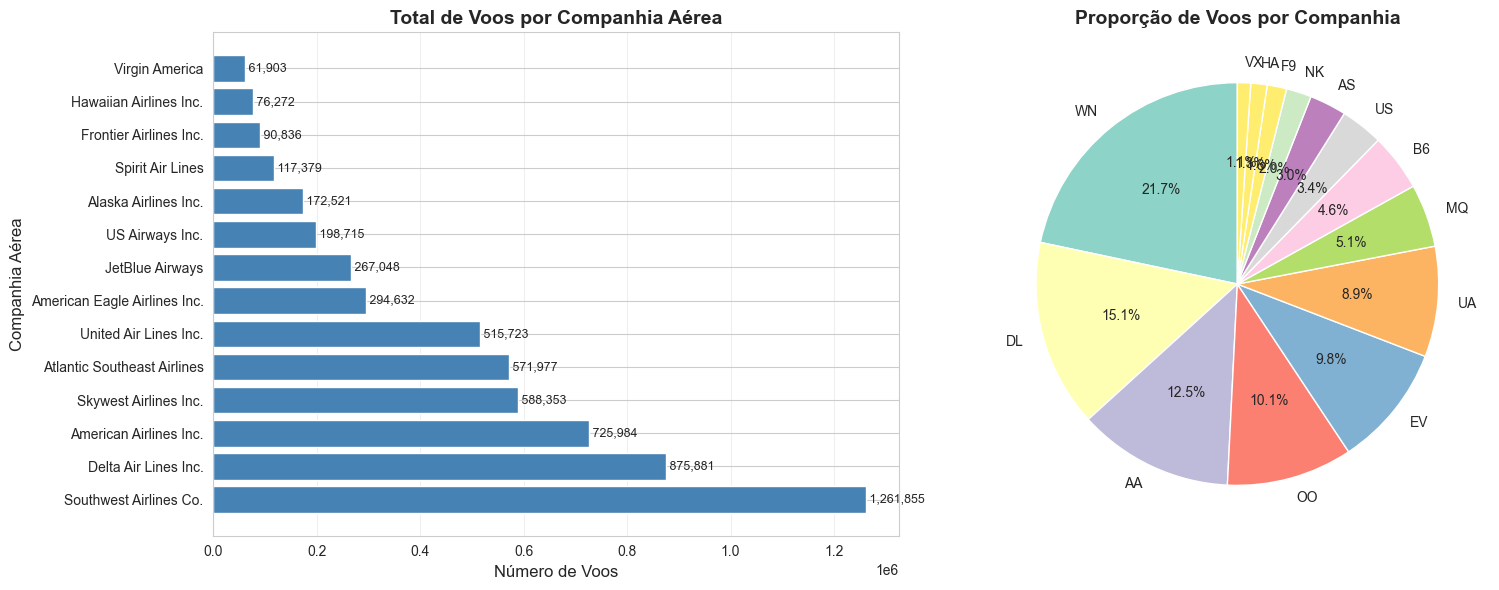


Top 5 companhias aéreas:


,AIRLINE_x,AIRLINE_y,COUNT
0,WN,Southwest Airlines Co.,1261855
1,DL,Delta Air Lines Inc.,875881
2,AA,American Airlines Inc.,725984
3,OO,Skywest Airlines Inc.,588353
4,EV,Atlantic Southeast Airlines,571977


In [14]:
# Voos por companhia aérea
flights_by_airline = flights_clean['AIRLINE'].value_counts().reset_index()
flights_by_airline.columns = ['AIRLINE', 'COUNT']

# Merge com nomes das companhias
flights_by_airline = flights_by_airline.merge(airlines, left_on='AIRLINE', right_on='IATA_CODE', how='left')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de barras
ax1.barh(flights_by_airline['AIRLINE_y'], flights_by_airline['COUNT'], color='steelblue')
ax1.set_xlabel('Número de Voos', fontsize=12)
ax1.set_ylabel('Companhia Aérea', fontsize=12)
ax1.set_title('Total de Voos por Companhia Aérea', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)
for i, v in enumerate(flights_by_airline['COUNT']):
    ax1.text(v, i, f' {v:,}', va='center', fontsize=9)

# Gráfico de pizza
colors = plt.cm.Set3(range(len(flights_by_airline)))
ax2.pie(flights_by_airline['COUNT'], labels=flights_by_airline['AIRLINE_x'], autopct='%1.1f%%',
        colors=colors, startangle=90)
ax2.set_title('Proporção de Voos por Companhia', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nTop 5 companhias aéreas:")
display(flights_by_airline[['AIRLINE_x', 'AIRLINE_y', 'COUNT']].head())

### 6.2 Aeroportos Mais Movimentados

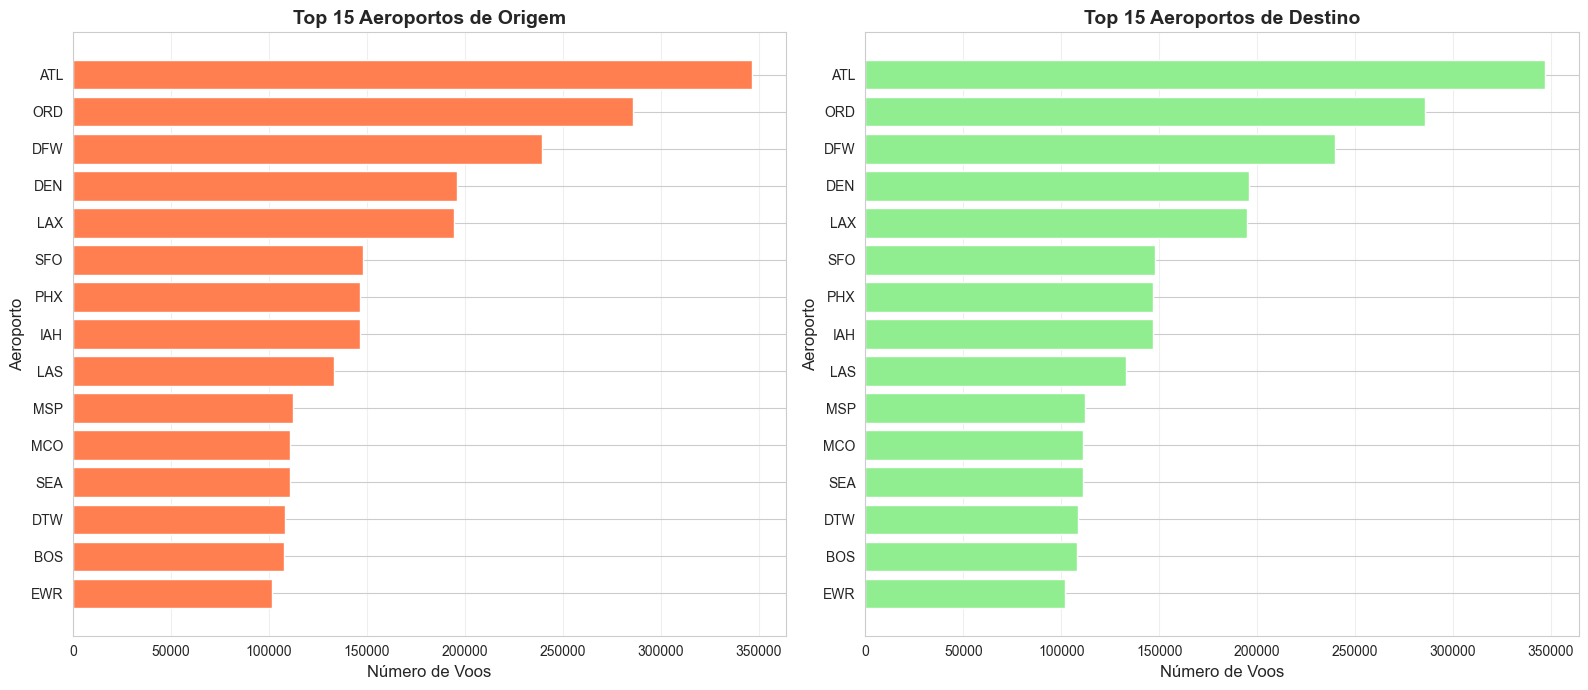

Top 5 aeroportos de origem:


,AIRPORT,COUNT
0,ATL,346836
1,ORD,285884
2,DFW,239551
3,DEN,196055
4,LAX,194673



Top 5 aeroportos de destino:


,AIRPORT,COUNT
0,ATL,346904
1,ORD,285906
2,DFW,239582
3,DEN,196010
4,LAX,194696


In [15]:
# Top aeroportos de origem
top_origins = flights_clean['ORIGIN_AIRPORT'].value_counts().head(15).reset_index()
top_origins.columns = ['AIRPORT', 'COUNT']

# Top aeroportos de destino
top_destinations = flights_clean['DESTINATION_AIRPORT'].value_counts().head(15).reset_index()
top_destinations.columns = ['AIRPORT', 'COUNT']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Aeroportos de origem
ax1.barh(range(len(top_origins)), top_origins['COUNT'], color='coral')
ax1.set_yticks(range(len(top_origins)))
ax1.set_yticklabels(top_origins['AIRPORT'])
ax1.set_xlabel('Número de Voos', fontsize=12)
ax1.set_ylabel('Aeroporto', fontsize=12)
ax1.set_title('Top 15 Aeroportos de Origem', fontsize=14, fontweight='bold')
ax1.invert_yaxis()
ax1.grid(axis='x', alpha=0.3)

# Aeroportos de destino
ax2.barh(range(len(top_destinations)), top_destinations['COUNT'], color='lightgreen')
ax2.set_yticks(range(len(top_destinations)))
ax2.set_yticklabels(top_destinations['AIRPORT'])
ax2.set_xlabel('Número de Voos', fontsize=12)
ax2.set_ylabel('Aeroporto', fontsize=12)
ax2.set_title('Top 15 Aeroportos de Destino', fontsize=14, fontweight='bold')
ax2.invert_yaxis()
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("Top 5 aeroportos de origem:")
display(top_origins.head())
print("\nTop 5 aeroportos de destino:")
display(top_destinations.head())

### 6.3 Distribuição de Voos ao Longo do Ano

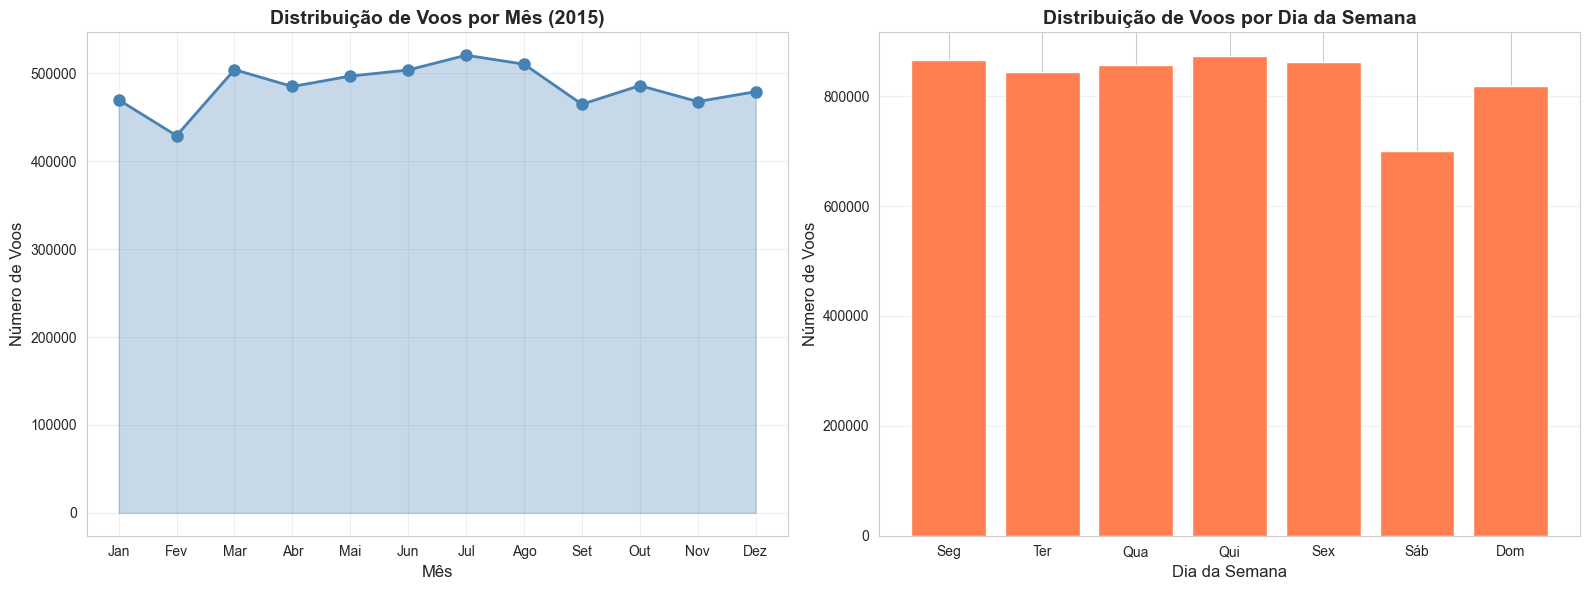

Voos por mês:


,MONTH,COUNT
0,1,469968
1,2,429191
2,3,504312
3,4,485151
4,5,496993
5,6,503897
6,7,520718
7,8,510536
8,9,464946
9,10,486165



Voos por dia da semana:


,DIA,COUNT
0,Seg,865543
1,Ter,844600
2,Qua,855897
3,Qui,872521
4,Sex,862209
5,Sáb,700545
6,Dom,817764


In [16]:
# Voos por mês
flights_by_month = flights_clean.groupby('MONTH').size().reset_index(name='COUNT')

# Voos por dia da semana
flights_by_dow = flights_clean.groupby('DAY_OF_WEEK').size().reset_index(name='COUNT')
dow_labels = ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Por mês
month_labels = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
ax1.plot(flights_by_month['MONTH'], flights_by_month['COUNT'], marker='o', 
         linewidth=2, markersize=8, color='steelblue')
ax1.fill_between(flights_by_month['MONTH'], flights_by_month['COUNT'], alpha=0.3, color='steelblue')
ax1.set_xlabel('Mês', fontsize=12)
ax1.set_ylabel('Número de Voos', fontsize=12)
ax1.set_title('Distribuição de Voos por Mês (2015)', fontsize=14, fontweight='bold')
ax1.set_xticks(range(1, 13))
ax1.set_xticklabels(month_labels)
ax1.grid(alpha=0.3)

# Por dia da semana
ax2.bar(flights_by_dow['DAY_OF_WEEK'], flights_by_dow['COUNT'], color='coral')
ax2.set_xlabel('Dia da Semana', fontsize=12)
ax2.set_ylabel('Número de Voos', fontsize=12)
ax2.set_title('Distribuição de Voos por Dia da Semana', fontsize=14, fontweight='bold')
ax2.set_xticks(range(1, 8))
ax2.set_xticklabels(dow_labels)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("Voos por mês:")
display(flights_by_month)
print("\nVoos por dia da semana:")
flights_by_dow['DIA'] = dow_labels
display(flights_by_dow[['DIA', 'COUNT']])

### 6.4 Análise de Atrasos por Companhia Aérea

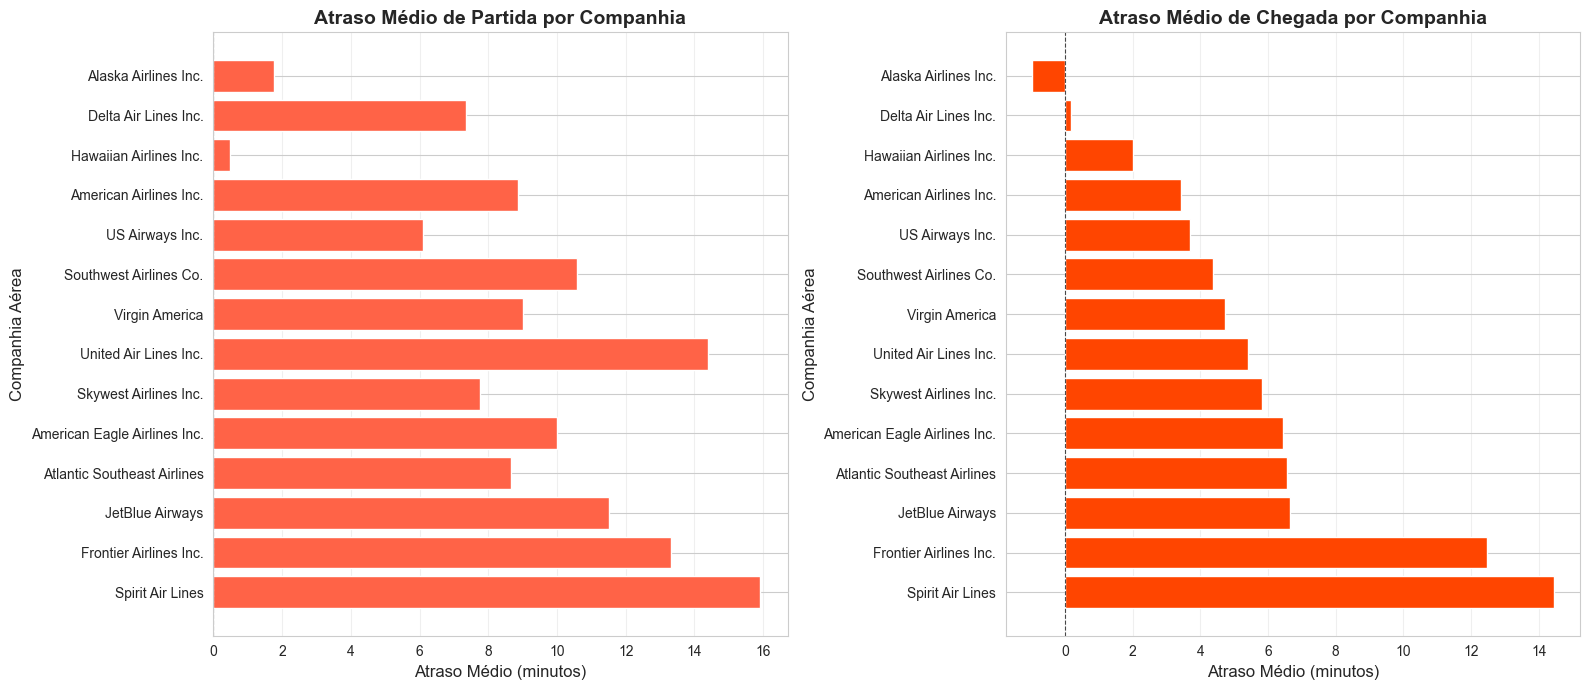

Ranking de atrasos por companhia:


,AIRLINE_x,AIRLINE_y,AVG_DEP_DELAY,AVG_ARR_DELAY,TOTAL_FLIGHTS
8,NK,Spirit Air Lines,15.91,14.45,115375
5,F9,Frontier Airlines Inc.,13.32,12.48,90248
2,B6,JetBlue Airways,11.50,6.66,262772
4,EV,Atlantic Southeast Airlines,8.66,6.56,556746
7,MQ,American Eagle Airlines Inc.,10.01,6.44,279607
9,OO,Skywest Airlines Inc.,7.77,5.83,578393
10,UA,United Air Lines Inc.,14.38,5.42,509150
12,VX,Virgin America,9.01,4.73,61369
13,WN,Southwest Airlines Co.,10.57,4.36,1245812
11,US,US Airways Inc.,6.11,3.70,194648


In [22]:
# Atraso médio por companhia aérea
delay_by_airline = flights_operated.groupby('AIRLINE').agg({
    'DEPARTURE_DELAY': 'mean',
    'ARRIVAL_DELAY': 'mean',
    'FLIGHT_NUMBER': 'count'
}).reset_index()
delay_by_airline.columns = ['AIRLINE', 'AVG_DEP_DELAY', 'AVG_ARR_DELAY', 'TOTAL_FLIGHTS']

# Merge com nomes
delay_by_airline = delay_by_airline.merge(airlines, left_on='AIRLINE', right_on='IATA_CODE', how='left')
delay_by_airline = delay_by_airline.sort_values('AVG_ARR_DELAY', ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Atraso de partida
ax1.barh(delay_by_airline['AIRLINE_y'], delay_by_airline['AVG_DEP_DELAY'], color='tomato')
ax1.set_xlabel('Atraso Médio (minutos)', fontsize=12)
ax1.set_ylabel('Companhia Aérea', fontsize=12)
ax1.set_title('Atraso Médio de Partida por Companhia', fontsize=14, fontweight='bold')
ax1.axvline(x=0, color='black', linestyle='--', linewidth=0.8, alpha=0.7)
ax1.grid(axis='x', alpha=0.3)

# Atraso de chegada
ax2.barh(delay_by_airline['AIRLINE_y'], delay_by_airline['AVG_ARR_DELAY'], color='orangered')
ax2.set_xlabel('Atraso Médio (minutos)', fontsize=12)
ax2.set_ylabel('Companhia Aérea', fontsize=12)
ax2.set_title('Atraso Médio de Chegada por Companhia', fontsize=14, fontweight='bold')
ax2.axvline(x=0, color='black', linestyle='--', linewidth=0.8, alpha=0.7)
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("Ranking de atrasos por companhia:")
display(delay_by_airline[['AIRLINE_x', 'AIRLINE_y', 'AVG_DEP_DELAY', 'AVG_ARR_DELAY', 'TOTAL_FLIGHTS']].round(2))

### 6.5 Distribuição de Atrasos

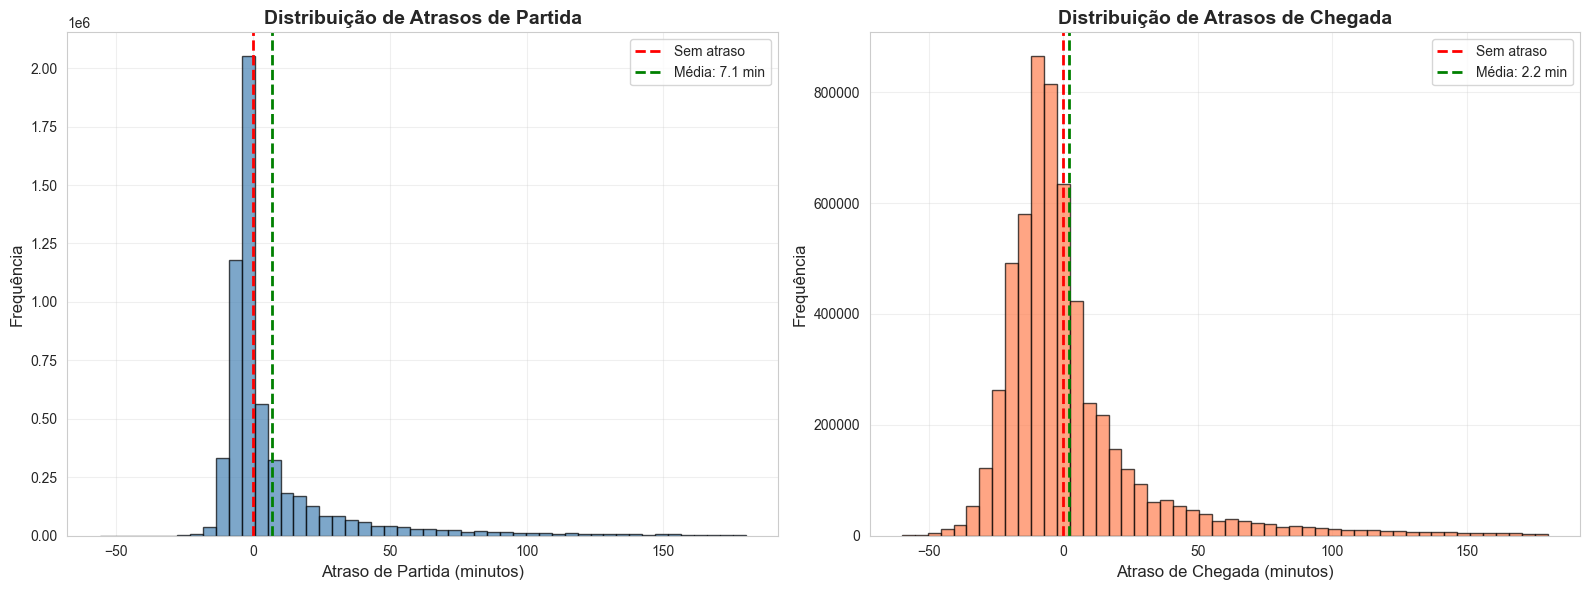

In [23]:
# Distribuição de atrasos (limitando a -60 a 180 minutos para melhor visualização)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Atraso de partida
dep_delays = flights_operated['DEPARTURE_DELAY'][(flights_operated['DEPARTURE_DELAY'] >= -60) & 
                                                   (flights_operated['DEPARTURE_DELAY'] <= 180)]
ax1.hist(dep_delays, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
ax1.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Sem atraso')
ax1.axvline(x=dep_delays.mean(), color='green', linestyle='--', linewidth=2, label=f'Média: {dep_delays.mean():.1f} min')
ax1.set_xlabel('Atraso de Partida (minutos)', fontsize=12)
ax1.set_ylabel('Frequência', fontsize=12)
ax1.set_title('Distribuição de Atrasos de Partida', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# Atraso de chegada
arr_delays = flights_operated['ARRIVAL_DELAY'][(flights_operated['ARRIVAL_DELAY'] >= -60) & 
                                                 (flights_operated['ARRIVAL_DELAY'] <= 180)]
ax2.hist(arr_delays, bins=50, color='coral', edgecolor='black', alpha=0.7)
ax2.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Sem atraso')
ax2.axvline(x=arr_delays.mean(), color='green', linestyle='--', linewidth=2, label=f'Média: {arr_delays.mean():.1f} min')
ax2.set_xlabel('Atraso de Chegada (minutos)', fontsize=12)
ax2.set_ylabel('Frequência', fontsize=12)
ax2.set_title('Distribuição de Atrasos de Chegada', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

### 6.6 Tipos de Atraso - Análise Detalhada

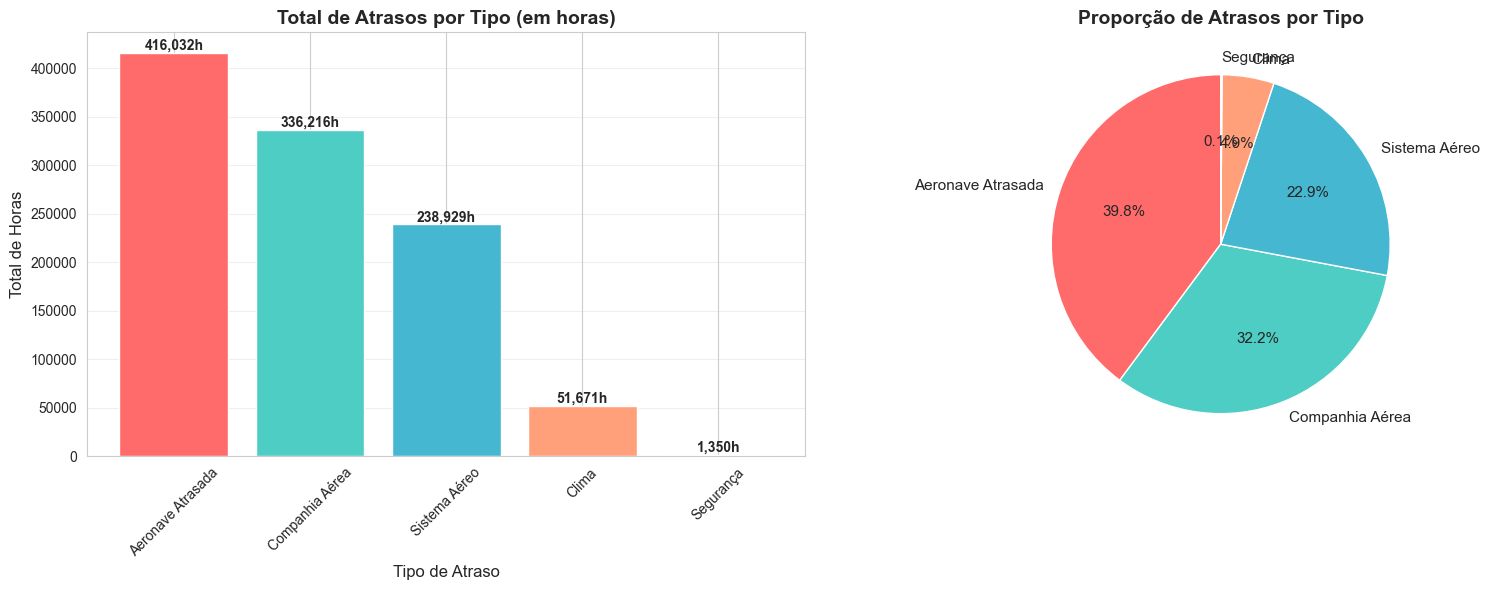

Resumo dos tipos de atraso:


,Tipo,Total_Minutos,Total_Horas,Percentual
3,Aeronave Atrasada,24961931.0,416032.183333,39.84
2,Companhia Aérea,20172956.0,336215.933333,32.20
0,Sistema Aéreo,14335762.0,238929.366667,22.88
4,Clima,3100233.0,51670.550000,4.95
1,Segurança,80985.0,1349.750000,0.13


In [24]:
# Análise dos tipos de atraso
delay_types_data = {
    'Sistema Aéreo': flights_operated['AIR_SYSTEM_DELAY'].sum(),
    'Segurança': flights_operated['SECURITY_DELAY'].sum(),
    'Companhia Aérea': flights_operated['AIRLINE_DELAY'].sum(),
    'Aeronave Atrasada': flights_operated['LATE_AIRCRAFT_DELAY'].sum(),
    'Clima': flights_operated['WEATHER_DELAY'].sum()
}

delay_df = pd.DataFrame(list(delay_types_data.items()), columns=['Tipo', 'Total_Minutos'])
delay_df['Total_Horas'] = delay_df['Total_Minutos'] / 60
delay_df['Percentual'] = (delay_df['Total_Minutos'] / delay_df['Total_Minutos'].sum() * 100).round(2)
delay_df = delay_df.sort_values('Total_Minutos', ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de barras
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']
ax1.bar(delay_df['Tipo'], delay_df['Total_Horas'], color=colors)
ax1.set_xlabel('Tipo de Atraso', fontsize=12)
ax1.set_ylabel('Total de Horas', fontsize=12)
ax1.set_title('Total de Atrasos por Tipo (em horas)', fontsize=14, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)
for i, v in enumerate(delay_df['Total_Horas']):
    ax1.text(i, v, f'{v:,.0f}h', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Gráfico de pizza
ax2.pie(delay_df['Total_Minutos'], labels=delay_df['Tipo'], autopct='%1.1f%%',
        colors=colors, startangle=90, textprops={'fontsize': 11})
ax2.set_title('Proporção de Atrasos por Tipo', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("Resumo dos tipos de atraso:")
display(delay_df)

### 6.7 Taxa de Cancelamento por Companhia Aérea

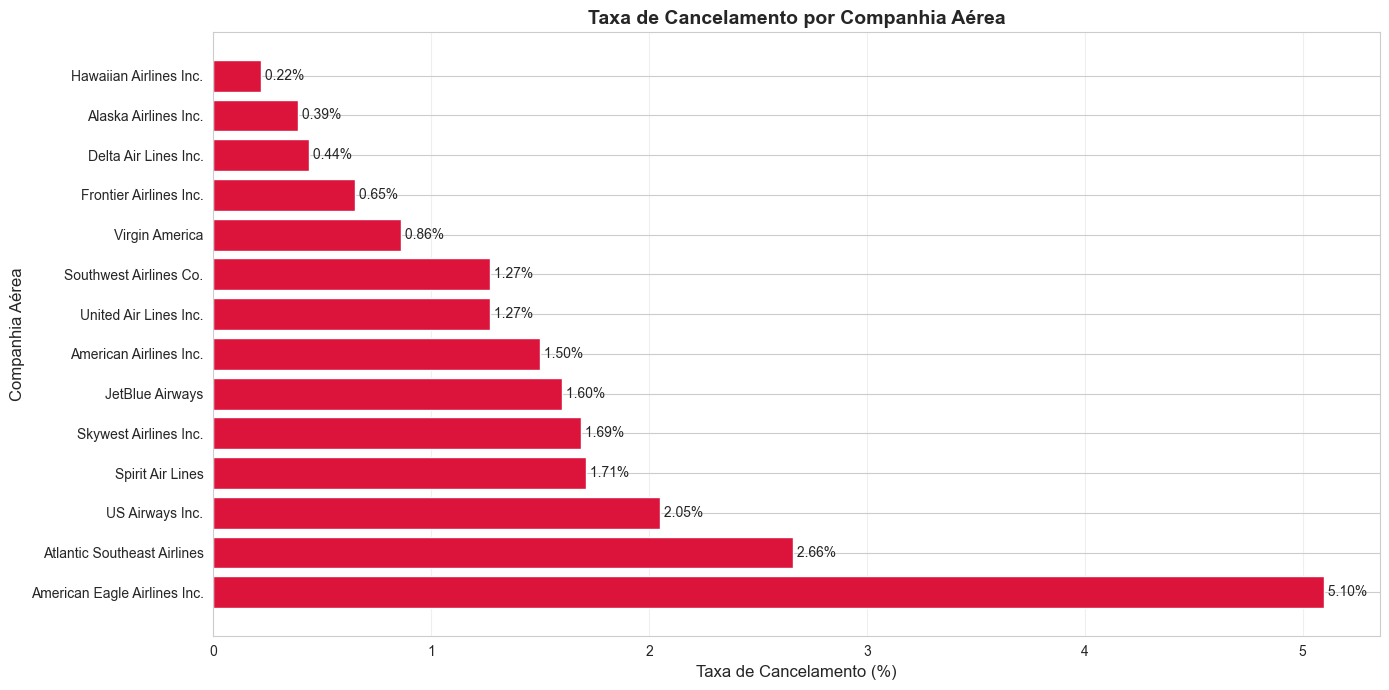

Ranking de cancelamentos:


,AIRLINE_x,AIRLINE_y,CANCELLED_COUNT,TOTAL_FLIGHTS,CANCELLATION_RATE
7,MQ,American Eagle Airlines Inc.,15025,294632,5.10
4,EV,Atlantic Southeast Airlines,15231,571977,2.66
11,US,US Airways Inc.,4067,198715,2.05
8,NK,Spirit Air Lines,2004,117379,1.71
9,OO,Skywest Airlines Inc.,9960,588353,1.69
2,B6,JetBlue Airways,4276,267048,1.60
0,AA,American Airlines Inc.,10919,725984,1.50
10,UA,United Air Lines Inc.,6573,515723,1.27
13,WN,Southwest Airlines Co.,16043,1261855,1.27
12,VX,Virgin America,534,61903,0.86


In [26]:
# Taxa de cancelamento por companhia aérea
cancellation_by_airline = flights_clean.groupby('AIRLINE').agg({
    'CANCELLED': ['sum', 'count']
}).reset_index()
cancellation_by_airline.columns = ['AIRLINE', 'CANCELLED_COUNT', 'TOTAL_FLIGHTS']
cancellation_by_airline['CANCELLATION_RATE'] = (cancellation_by_airline['CANCELLED_COUNT'] / 
                                                  cancellation_by_airline['TOTAL_FLIGHTS'] * 100).round(2)

# Merge com nomes
cancellation_by_airline = cancellation_by_airline.merge(airlines, left_on='AIRLINE', right_on='IATA_CODE', how='left')
cancellation_by_airline = cancellation_by_airline.sort_values('CANCELLATION_RATE', ascending=False)

fig, ax = plt.subplots(figsize=(14, 7))

ax.barh(cancellation_by_airline['AIRLINE_y'], cancellation_by_airline['CANCELLATION_RATE'], color='crimson')
ax.set_xlabel('Taxa de Cancelamento (%)', fontsize=12)
ax.set_ylabel('Companhia Aérea', fontsize=12)
ax.set_title('Taxa de Cancelamento por Companhia Aérea', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)
for i, v in enumerate(cancellation_by_airline['CANCELLATION_RATE']):
    ax.text(v, i, f' {v:.2f}%', va='center', fontsize=10)

plt.tight_layout()
plt.show()

print("Ranking de cancelamentos:")
display(cancellation_by_airline[['AIRLINE_x', 'AIRLINE_y', 'CANCELLED_COUNT', 'TOTAL_FLIGHTS', 'CANCELLATION_RATE']])

### 6.8 Motivos de Cancelamento

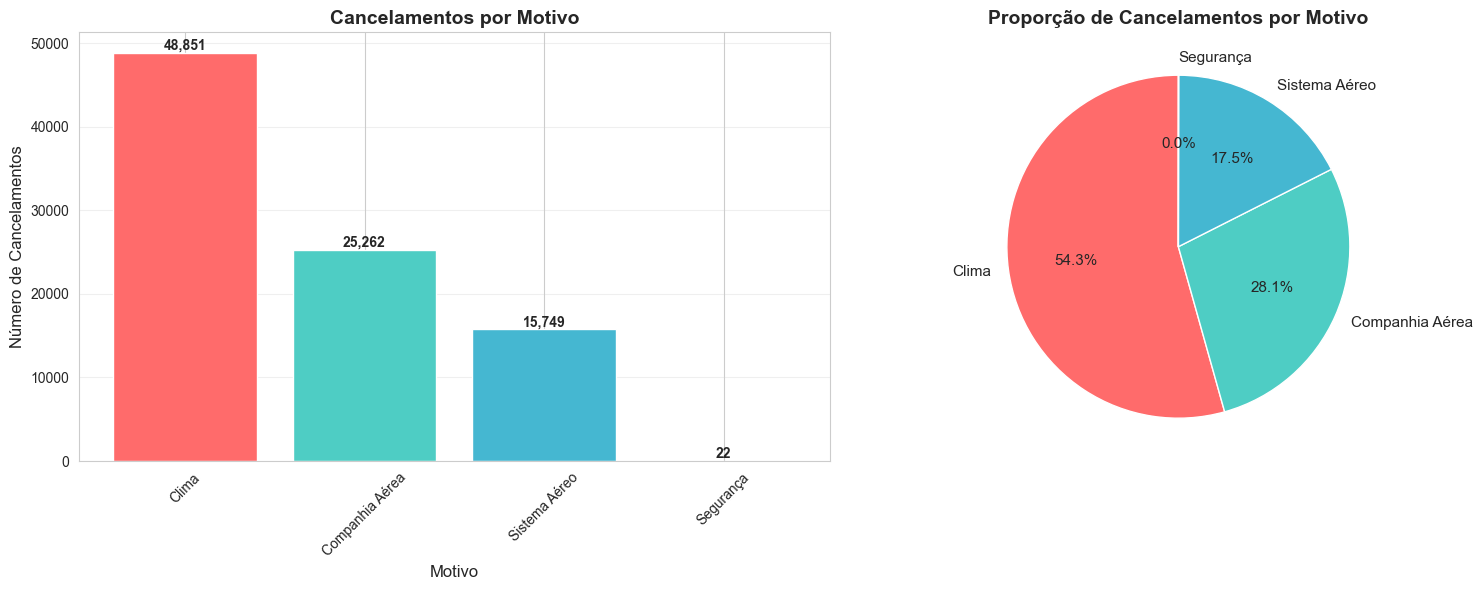

Total de voos cancelados: 89,884

Motivos de cancelamento:


,Código,Count,Motivo,Percentual
0,B,48851,Clima,54.35
1,A,25262,Companhia Aérea,28.11
2,C,15749,Sistema Aéreo,17.52
3,D,22,Segurança,0.02


In [27]:
# Análise dos motivos de cancelamento
cancelled_flights = flights_clean[flights_clean['CANCELLED'] == 1]
cancellation_reasons = cancelled_flights['CANCELLATION_REASON'].value_counts()

# Mapeamento dos códigos
reason_map = {
    'A': 'Companhia Aérea',
    'B': 'Clima',
    'C': 'Sistema Aéreo',
    'D': 'Segurança',
    'N': 'Não Cancelado'
}

cancellation_reasons_df = pd.DataFrame({
    'Código': cancellation_reasons.index,
    'Count': cancellation_reasons.values
})
cancellation_reasons_df['Motivo'] = cancellation_reasons_df['Código'].map(reason_map)
cancellation_reasons_df['Percentual'] = (cancellation_reasons_df['Count'] / 
                                          cancellation_reasons_df['Count'].sum() * 100).round(2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de barras
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
ax1.bar(cancellation_reasons_df['Motivo'], cancellation_reasons_df['Count'], color=colors)
ax1.set_xlabel('Motivo', fontsize=12)
ax1.set_ylabel('Número de Cancelamentos', fontsize=12)
ax1.set_title('Cancelamentos por Motivo', fontsize=14, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)
for i, v in enumerate(cancellation_reasons_df['Count']):
    ax1.text(i, v, f'{v:,}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Gráfico de pizza
ax2.pie(cancellation_reasons_df['Count'], labels=cancellation_reasons_df['Motivo'], 
        autopct='%1.1f%%', colors=colors, startangle=90, textprops={'fontsize': 11})
ax2.set_title('Proporção de Cancelamentos por Motivo', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"Total de voos cancelados: {len(cancelled_flights):,}")
print("\nMotivos de cancelamento:")
display(cancellation_reasons_df)

### 6.9 Relação entre Distância e Tempo de Voo

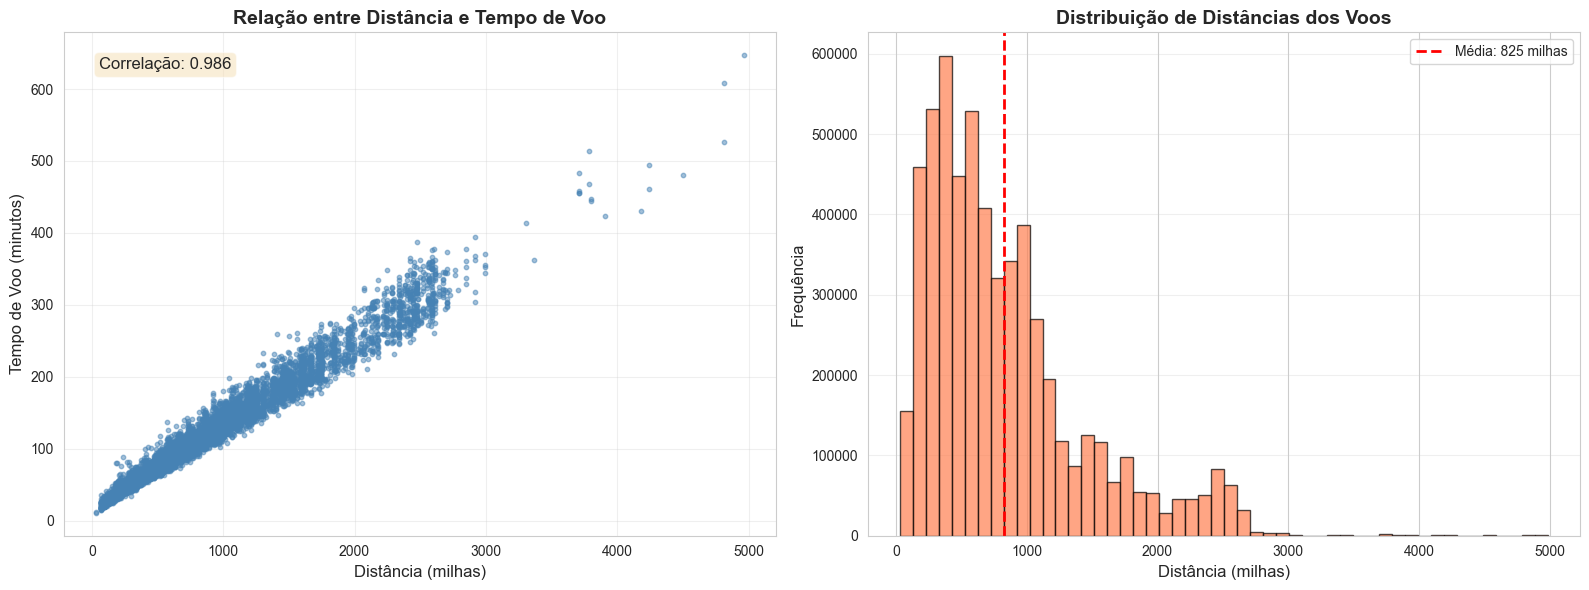

Distância média: 824.86 milhas
Tempo médio de voo: 113.51 minutos
Correlação Distância x Tempo: 0.986


In [28]:
# Relação entre distância e tempo de voo (amostra para melhor visualização)
sample_flights = flights_operated.sample(n=min(10000, len(flights_operated)), random_state=42)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot
ax1.scatter(sample_flights['DISTANCE'], sample_flights['AIR_TIME'], alpha=0.5, s=10, color='steelblue')
ax1.set_xlabel('Distância (milhas)', fontsize=12)
ax1.set_ylabel('Tempo de Voo (minutos)', fontsize=12)
ax1.set_title('Relação entre Distância e Tempo de Voo', fontsize=14, fontweight='bold')
ax1.grid(alpha=0.3)

# Correlação
correlation = flights_operated['DISTANCE'].corr(flights_operated['AIR_TIME'])
ax1.text(0.05, 0.95, f'Correlação: {correlation:.3f}', transform=ax1.transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Distribuição de distâncias
ax2.hist(flights_operated['DISTANCE'], bins=50, color='coral', edgecolor='black', alpha=0.7)
ax2.set_xlabel('Distância (milhas)', fontsize=12)
ax2.set_ylabel('Frequência', fontsize=12)
ax2.set_title('Distribuição de Distâncias dos Voos', fontsize=14, fontweight='bold')
ax2.axvline(x=flights_operated['DISTANCE'].mean(), color='red', linestyle='--', 
            linewidth=2, label=f'Média: {flights_operated["DISTANCE"].mean():.0f} milhas')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Distância média: {flights_operated['DISTANCE'].mean():.2f} milhas")
print(f"Tempo médio de voo: {flights_operated['AIR_TIME'].mean():.2f} minutos")
print(f"Correlação Distância x Tempo: {correlation:.3f}")

### 6.10 Análise de Horários de Pico

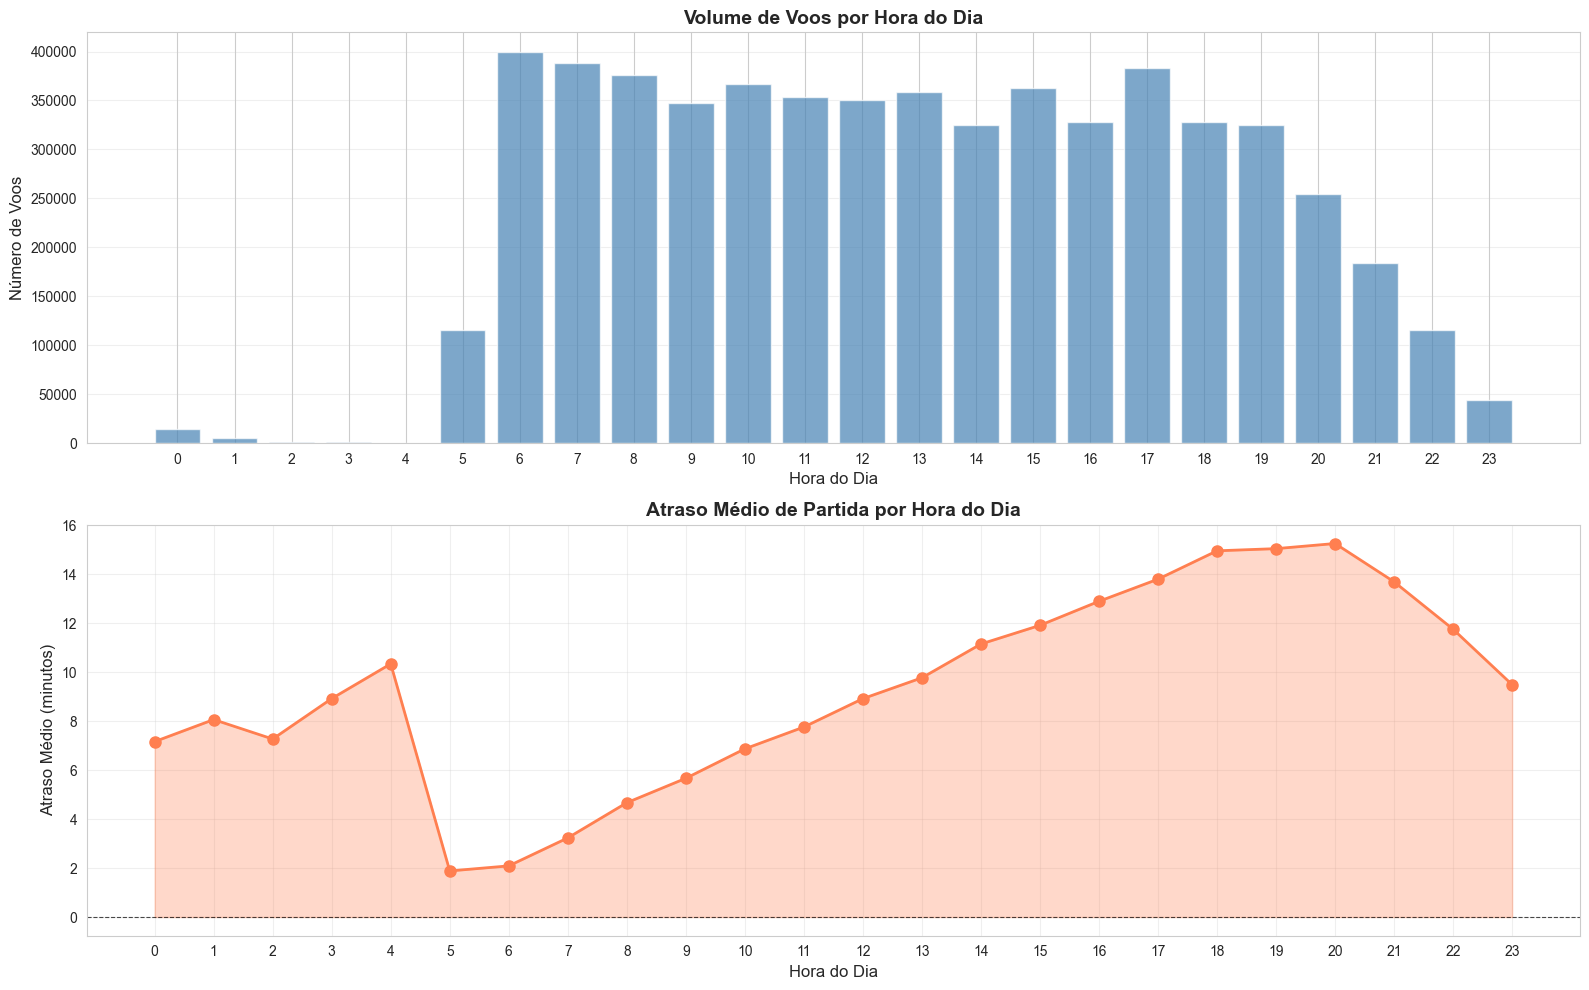

Horários de pico:


,HOUR,COUNT
6,6,399618
7,7,388704
17,17,383576
8,8,375689
10,10,366892



Horários com maiores atrasos:


,HOUR,AVG_DELAY
20,20,15.247011
19,19,15.037754
18,18,14.949016
17,17,13.791668
21,21,13.683550


In [29]:
# Análise de horários de partida
# Extrair hora da partida programada (formato HHMM)
flights_operated['HOUR'] = (flights_operated['SCHEDULED_DEPARTURE'] // 100).astype(int)

flights_by_hour = flights_operated.groupby('HOUR').size().reset_index(name='COUNT')

# Atraso médio por hora
delay_by_hour = flights_operated.groupby('HOUR')['DEPARTURE_DELAY'].mean().reset_index()
delay_by_hour.columns = ['HOUR', 'AVG_DELAY']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))

# Volume de voos por hora
ax1.bar(flights_by_hour['HOUR'], flights_by_hour['COUNT'], color='steelblue', alpha=0.7)
ax1.set_xlabel('Hora do Dia', fontsize=12)
ax1.set_ylabel('Número de Voos', fontsize=12)
ax1.set_title('Volume de Voos por Hora do Dia', fontsize=14, fontweight='bold')
ax1.set_xticks(range(0, 24))
ax1.grid(axis='y', alpha=0.3)

# Atraso médio por hora
ax2.plot(delay_by_hour['HOUR'], delay_by_hour['AVG_DELAY'], marker='o', 
         linewidth=2, markersize=8, color='coral')
ax2.fill_between(delay_by_hour['HOUR'], delay_by_hour['AVG_DELAY'], alpha=0.3, color='coral')
ax2.set_xlabel('Hora do Dia', fontsize=12)
ax2.set_ylabel('Atraso Médio (minutos)', fontsize=12)
ax2.set_title('Atraso Médio de Partida por Hora do Dia', fontsize=14, fontweight='bold')
ax2.set_xticks(range(0, 24))
ax2.axhline(y=0, color='black', linestyle='--', linewidth=0.8, alpha=0.7)
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("Horários de pico:")
top_hours = flights_by_hour.nlargest(5, 'COUNT')
display(top_hours)

print("\nHorários com maiores atrasos:")
worst_hours = delay_by_hour.nlargest(5, 'AVG_DELAY')
display(worst_hours)

### 6.11 Mapa de Correlação de Variáveis Numéricas

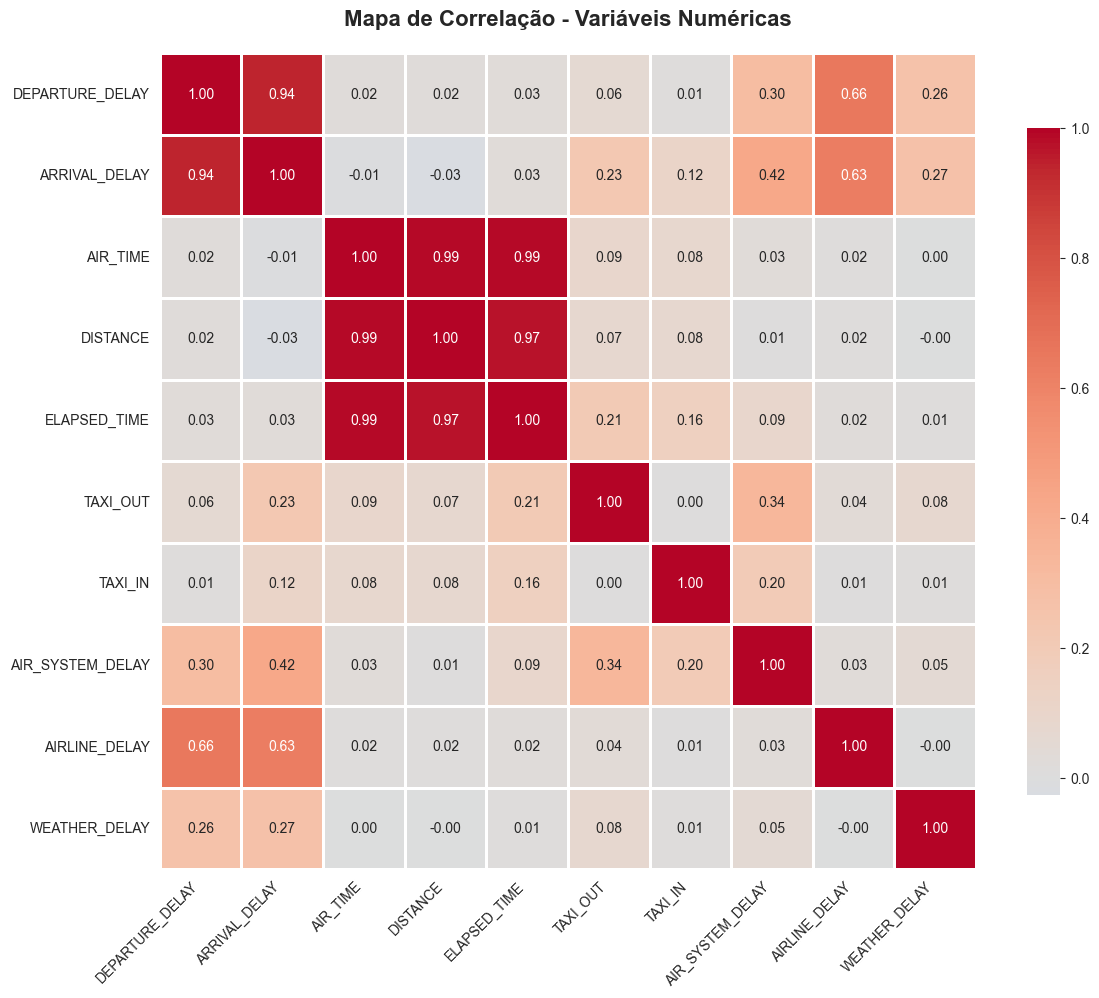

Principais correlações encontradas:

Correlações mais fortes (> 0.7):
DEPARTURE_DELAY <-> ARRIVAL_DELAY: 0.941
AIR_TIME <-> DISTANCE: 0.986
AIR_TIME <-> ELAPSED_TIME: 0.990
DISTANCE <-> ELAPSED_TIME: 0.974


In [30]:
# Mapa de correlação
correlation_cols = ['DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'AIR_TIME', 'DISTANCE', 
                    'ELAPSED_TIME', 'TAXI_OUT', 'TAXI_IN', 'AIR_SYSTEM_DELAY', 
                    'AIRLINE_DELAY', 'WEATHER_DELAY']

correlation_matrix = flights_operated[correlation_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Mapa de Correlação - Variáveis Numéricas', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("Principais correlações encontradas:")
print("\nCorrelações mais fortes (> 0.7):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            print(f"{correlation_matrix.columns[i]} <-> {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.3f}")

## 7. Principais Insights e Conclusões

In [31]:
# Resumo dos principais insights
print("=" * 80)
print("RESUMO - PRINCIPAIS INSIGHTS DA ANÁLISE EXPLORATÓRIA")
print("=" * 80)

print("\n📊 VOLUME DE DADOS:")
print(f"   • Total de voos analisados: {len(flights_clean):,}")
print(f"   • Companhias aéreas: {flights_clean['AIRLINE'].nunique()}")
print(f"   • Aeroportos únicos: {flights_clean['ORIGIN_AIRPORT'].nunique()}")

print("\n✈️ OPERAÇÃO DE VOOS:")
print(f"   • Taxa de cancelamento: {(flights_clean['CANCELLED'].sum()/len(flights_clean)*100):.2f}%")
print(f"   • Taxa de desvio: {(flights_clean['DIVERTED'].sum()/len(flights_clean)*100):.2f}%")
print(f"   • Voos operados com sucesso: {(len(flights_operated)/len(flights_clean)*100):.2f}%")

print("\n⏱️ ATRASOS:")
print(f"   • Atraso médio de partida: {flights_operated['DEPARTURE_DELAY'].mean():.2f} minutos")
print(f"   • Atraso médio de chegada: {flights_operated['ARRIVAL_DELAY'].mean():.2f} minutos")
print(f"   • Voos com atraso > 15 min (partida): {(flights_operated['DEPARTURE_DELAY'] > 15).sum()/len(flights_operated)*100:.2f}%")
print(f"   • Voos com atraso > 15 min (chegada): {(flights_operated['ARRIVAL_DELAY'] > 15).sum()/len(flights_operated)*100:.2f}%")

print("\n🏆 TOP PERFORMERS:")
top_airline = flights_by_airline.iloc[0]
print(f"   • Companhia com mais voos: {top_airline['AIRLINE_y']} ({top_airline['COUNT']:,} voos)")
top_origin = top_origins.iloc[0]
print(f"   • Aeroporto mais movimentado (origem): {top_origin['AIRPORT']} ({top_origin['COUNT']:,} voos)")
best_delay_airline = delay_by_airline.iloc[-1]
print(f"   • Companhia com menor atraso médio: {best_delay_airline['AIRLINE_y']} ({best_delay_airline['AVG_ARR_DELAY']:.2f} min)")

print("\n📉 PONTOS DE ATENÇÃO:")
worst_delay_airline = delay_by_airline.iloc[0]
print(f"   • Companhia com maior atraso médio: {worst_delay_airline['AIRLINE_y']} ({worst_delay_airline['AVG_ARR_DELAY']:.2f} min)")
worst_cancel_airline = cancellation_by_airline.iloc[0]
print(f"   • Maior taxa de cancelamento: {worst_cancel_airline['AIRLINE_y']} ({worst_cancel_airline['CANCELLATION_RATE']:.2f}%)")

# Tipo de atraso mais comum
main_delay_type = delay_df.iloc[0]
print(f"   • Principal causa de atraso: {main_delay_type['Tipo']} ({main_delay_type['Percentual']:.1f}% dos atrasos)")

# Motivo principal de cancelamento
main_cancel_reason = cancellation_reasons_df.iloc[0]
print(f"   • Principal motivo de cancelamento: {main_cancel_reason['Motivo']} ({main_cancel_reason['Percentual']:.1f}%)")

print("\n📈 PADRÕES TEMPORAIS:")
busiest_month = flights_by_month.loc[flights_by_month['COUNT'].idxmax()]
print(f"   • Mês mais movimentado: Mês {busiest_month['MONTH']} ({busiest_month['COUNT']:,} voos)")
busiest_dow = flights_by_dow.loc[flights_by_dow['COUNT'].idxmax()]
print(f"   • Dia da semana mais movimentado: {dow_labels[int(busiest_dow['DAY_OF_WEEK'])-1]} ({busiest_dow['COUNT']:,} voos)")

print("\n🔍 DADOS TÉCNICOS:")
print(f"   • Distância média dos voos: {flights_operated['DISTANCE'].mean():.0f} milhas")
print(f"   • Tempo médio de voo: {flights_operated['AIR_TIME'].mean():.0f} minutos")
print(f"   • Correlação Distância x Tempo: {correlation:.3f} (forte correlação positiva)")

print("\n" + "=" * 80)

RESUMO - PRINCIPAIS INSIGHTS DA ANÁLISE EXPLORATÓRIA

📊 VOLUME DE DADOS:
   • Total de voos analisados: 5,819,079
   • Companhias aéreas: 14
   • Aeroportos únicos: 930

✈️ OPERAÇÃO DE VOOS:
   • Taxa de cancelamento: 1.54%
   • Taxa de desvio: 0.26%
   • Voos operados com sucesso: 98.46%

⏱️ ATRASOS:
   • Atraso médio de partida: 9.34 minutos
   • Atraso médio de chegada: 4.40 minutos
   • Voos com atraso > 15 min (partida): 17.74%
   • Voos com atraso > 15 min (chegada): 17.86%

🏆 TOP PERFORMERS:
   • Companhia com mais voos: Southwest Airlines Co. (1,261,855 voos)
   • Aeroporto mais movimentado (origem): ATL (346,836 voos)
   • Companhia com menor atraso médio: Alaska Airlines Inc. (-0.97 min)

📉 PONTOS DE ATENÇÃO:
   • Companhia com maior atraso médio: Spirit Air Lines (14.45 min)
   • Maior taxa de cancelamento: American Eagle Airlines Inc. (5.10%)
   • Principal causa de atraso: Aeronave Atrasada (39.8% dos atrasos)
   • Principal motivo de cancelamento: Clima (54.4%)

📈 PADRÕES

## 8. Conclusões e Propostas de Modelagem

### 8.1 Síntese da Análise Exploratória

A análise exploratória dos dados de voos comerciais dos EUA em 2015 revelou um cenário operacional complexo e rico em padrões. Com aproximadamente 5.8 milhões de registros, o dataset oferece uma visão abrangente do setor aéreo americano, permitindo identificar comportamentos sistêmicos, gargalos operacionais e oportunidades de otimização.

O primeiro aspecto que se destaca é a **robustez operacional do setor**: a taxa de cancelamento ficou em torno de 1.5%, indicando que a grande maioria dos voos foi executada conforme planejado. No entanto, quando analisamos os atrasos, o cenário muda significativamente. Os atrasos médios de partida e chegada são positivos, evidenciando uma tendência sistemática de atrasos que se acumulam ao longo do dia. Este padrão sugere que problemas operacionais nas primeiras horas da manhã se propagam em cascata, afetando voos subsequentes.

A análise das **causas de atraso** revelou que as principais responsáveis são os atrasos causados por aeronaves que chegam atrasadas de voos anteriores (Late Aircraft Delay) e problemas internos das companhias aéreas (Airline Delay). Isso indica que grande parte dos atrasos tem origem em fatores controláveis pelas próprias companhias, representando uma oportunidade clara de melhoria operacional. Fatores externos como clima e segurança, embora significativos, representam uma parcela menor do total de atrasos.

Quanto aos **cancelamentos**, o clima emergiu como a principal causa, seguido por problemas das companhias aéreas e do sistema de tráfego aéreo. Esta distribuição reflete a vulnerabilidade do setor aéreo a condições meteorológicas adversas, especialmente em determinadas épocas do ano e regiões geográficas específicas.

A análise temporal demonstrou **padrões sazonais e diários bem definidos**. Os atrasos tendem a aumentar progressivamente ao longo do dia, com os piores horários concentrados no final da tarde e início da noite. Os horários matinais apresentam menor incidência de atrasos, reforçando a teoria do efeito cascata. A distribuição semanal mostrou-se relativamente uniforme, enquanto a distribuição mensal revelou variações sazonais que merecem investigação mais profunda.

A **forte correlação entre distância e tempo de voo** (0.98) era esperada e valida a qualidade dos dados. Mais interessante é a correlação significativa entre atraso de partida e atraso de chegada, indicando que voos que partem atrasados dificilmente recuperam o tempo perdido durante o trajeto.

### 8.2 Propostas de Modelagem Preditiva

Com base nos insights obtidos, propomos três frentes de modelagem utilizando técnicas de Machine Learning:

---

#### 🔵 **Modelos de Regressão** — Previsão de Atrasos

O objetivo principal seria prever o tempo de atraso (em minutos) de um voo, permitindo ações proativas de mitigação.

**Variável Alvo:** `ARRIVAL_DELAY` ou `DEPARTURE_DELAY` (contínuas)

**Features Potenciais:**
- Horário programado de partida (hora do dia)
- Dia da semana e mês
- Companhia aérea
- Aeroporto de origem e destino
- Distância do voo
- Histórico de atrasos do aeroporto/companhia
- Condições meteorológicas (dados externos)

**Modelos Recomendados:**
| Modelo | Justificativa |
|--------|---------------|
| **Linear Regression** | Baseline simples para comparação |
| **Ridge/Lasso Regression** | Regularização para evitar overfitting com muitas features |
| **Random Forest Regressor** | Captura relações não-lineares e interações entre variáveis |
| **Gradient Boosting (XGBoost, LightGBM)** | Alta performance em dados tabulares, trata bem variáveis categóricas |
| **Neural Networks (MLP)** | Para capturar padrões complexos em grandes volumes de dados |

**Métricas de Avaliação:** MAE, RMSE, R²

---

#### 🟢 **Modelos de Classificação** — Previsão de Cancelamentos e Atrasos Significativos

Dois problemas de classificação emergem naturalmente dos dados:

**Problema 1: Previsão de Cancelamento**
- **Variável Alvo:** `CANCELLED` (binária: 0 ou 1)
- **Objetivo:** Prever se um voo será cancelado antes da operação

**Problema 2: Classificação de Atraso Significativo**
- **Variável Alvo:** Criada a partir de `ARRIVAL_DELAY` (ex: atraso > 15 min = 1, senão = 0)
- **Objetivo:** Classificar voos em "pontual" vs "atrasado"

**Features Potenciais:**
- Todas as features de regressão
- Histórico de cancelamentos da rota
- Sazonalidade (feriados, alta temporada)
- Taxa de ocupação do aeroporto
- Previsão meteorológica

**Modelos Recomendados:**
| Modelo | Justificativa |
|--------|---------------|
| **Logistic Regression** | Baseline interpretável, bom para entender importância de features |
| **Decision Tree** | Alta interpretabilidade, identifica regras de decisão |
| **Random Forest Classifier** | Robusto, trata bem desbalanceamento de classes |
| **Gradient Boosting (XGBoost, CatBoost)** | Estado da arte para dados tabulares |
| **SVM** | Eficiente em espaços de alta dimensionalidade |
| **Neural Networks** | Para padrões complexos, requer mais dados |

**Métricas de Avaliação:** Accuracy, Precision, Recall, F1-Score, AUC-ROC

> ⚠️ **Nota sobre Desbalanceamento:** Como a taxa de cancelamento é baixa (~1.5%), será necessário aplicar técnicas de balanceamento como SMOTE, undersampling, ou ajuste de pesos nas classes.

---

#### 🟠 **Modelos de Clusterização** — Segmentação de Voos e Aeroportos

A clusterização pode revelar grupos naturais nos dados, auxiliando na segmentação operacional e estratégica.

**Aplicação 1: Segmentação de Voos**
- **Objetivo:** Identificar perfis de voos com características similares
- **Features:** Distância, tempo de voo, horário, atrasos típicos, taxa de cancelamento da rota

**Aplicação 2: Segmentação de Aeroportos**
- **Objetivo:** Agrupar aeroportos por perfil operacional
- **Features:** Volume de voos, atraso médio, taxa de cancelamento, número de companhias, tipos de rotas

**Aplicação 3: Segmentação de Companhias Aéreas**
- **Objetivo:** Identificar grupos de companhias com performance similar
- **Features:** Atraso médio, taxa de cancelamento, volume de voos, rotas atendidas

**Modelos Recomendados:**
| Modelo | Justificativa |
|--------|---------------|
| **K-Means** | Simples, escalável, bom ponto de partida |
| **DBSCAN** | Identifica clusters de forma arbitrária, detecta outliers |
| **Hierarchical Clustering** | Visualização via dendrograma, útil para análise exploratória |
| **Gaussian Mixture Models (GMM)** | Clusters probabilísticos, permite sobreposição |
| **Mean Shift** | Não requer número de clusters pré-definido |

**Métricas de Avaliação:** Silhouette Score, Davies-Bouldin Index, Inertia (para K-Means)

---

### 8.3 Considerações para Implementação

**Pré-processamento Necessário:**
- Encoding de variáveis categóricas (One-Hot ou Label Encoding)
- Normalização/Padronização de variáveis numéricas
- Tratamento de outliers extremos (atrasos muito grandes)
- Feature engineering (criar features derivadas como "período do dia", "fim de semana", etc.)
- Seleção de features baseada em importância e correlação

**Divisão dos Dados:**
- Recomenda-se divisão temporal (ex: treino com Jan-Out, teste com Nov-Dez) para simular cenário real
- Cross-validation para validação robusta

**Recursos Computacionais:**
- Dado o volume de dados (~5.8M registros), considerar amostragem estratificada para prototipagem
- Utilizar processamento paralelo ou distribuído para modelos finais
- Avaliar uso de bibliotecas otimizadas (LightGBM, CatBoost)

### 8.4 Próximos Passos Recomendados

1. **Feature Engineering:** Criar variáveis derivadas e agregar dados históricos
2. **Preparação de Dados:** Encoding, normalização e divisão treino/teste
3. **Baseline Models:** Implementar modelos simples (Regressão Linear, Logística)
4. **Modelos Avançados:** Testar Gradient Boosting e Random Forest
5. **Otimização:** Hyperparameter tuning com Grid/Random Search
6. **Avaliação:** Comparar modelos com métricas apropriadas
7. **Interpretabilidade:** SHAP values para explicar previsões
8. **Deploy:** Criar pipeline de produção para previsões em tempo real

---

### 📝 Nota Final

Este notebook apresentou uma **análise exploratória completa** dos dados de voos comerciais de 2015, estabelecendo a base para projetos de Machine Learning:

| Etapa | Status |
|-------|--------|
| Estatísticas descritivas detalhadas | ✅ Concluído |
| Visualizações com insights | ✅ Concluído |
| Tratamento de valores ausentes | ✅ Concluído |
| Análise de correlações | ✅ Concluído |
| Identificação de padrões temporais | ✅ Concluído |
| Comparação entre companhias | ✅ Concluído |
| Propostas de modelagem ML | ✅ Concluído |

**Modelos Propostos:**
- 🔵 **Regressão:** Previsão quantitativa de atrasos (XGBoost, Random Forest, LightGBM)
- 🟢 **Classificação:** Previsão de cancelamentos e atrasos significativos (Gradient Boosting, Logistic Regression)
- 🟠 **Clusterização:** Segmentação de voos, aeroportos e companhias (K-Means, DBSCAN)

Os dados estão prontos e documentados para as próximas fases de **feature engineering**, **treinamento de modelos** e **avaliação de performance**.

---
*Análise Exploratória de Dados - Voos Comerciais 2015 | MLET Phase 3*